In [16]:
import numpy as np
import pandas as pd

In [17]:
train_df = pd.read_csv('../datasets/train/train_text_seq.csv')
valid_df = pd.read_csv('../datasets/valid/valid_text_seq.csv')

## Digit Distribution

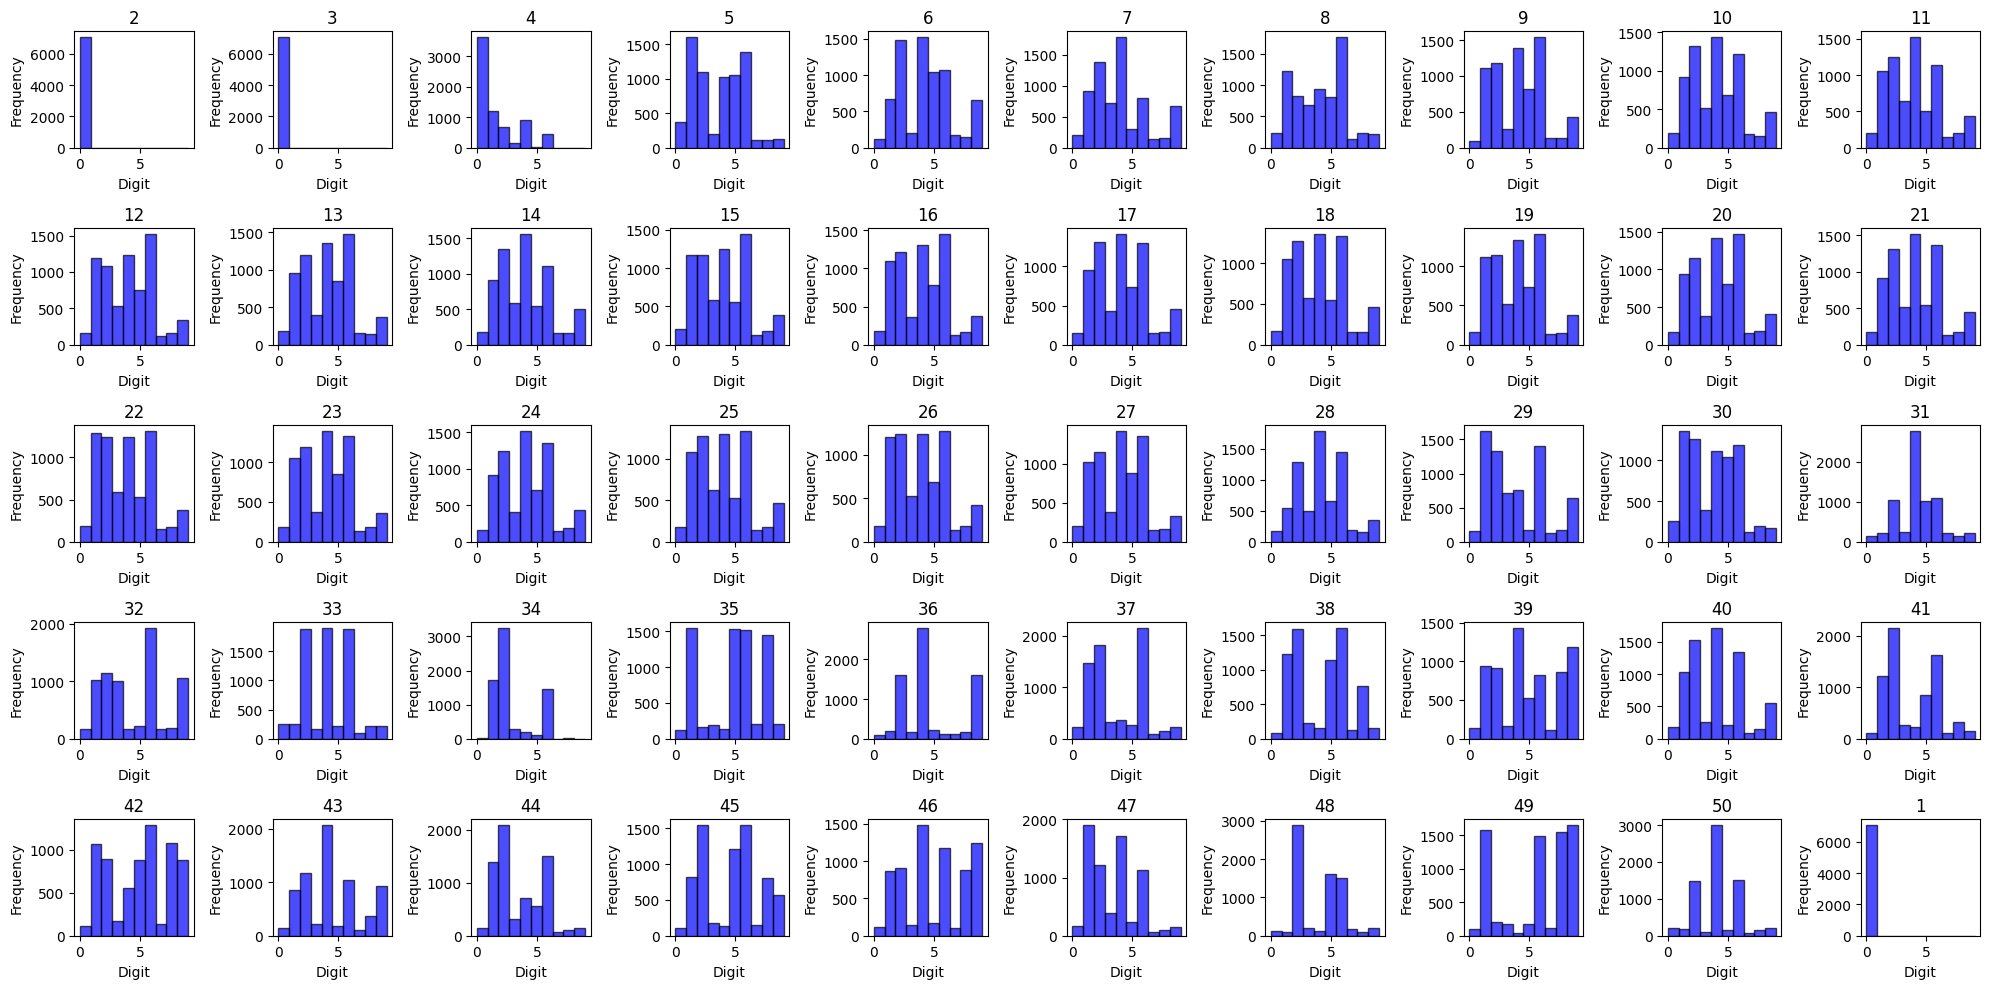

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is a list of strings
data = train_df['input_str'].to_list()

# Convert each string into individual digit columns
df = pd.DataFrame([list(map(int, list(s))) for s in data])

# Plot histograms for each feature
plt.subplots(5, 10, figsize=(20, 10))
for i in range(50):
    plt.hist(df[i], bins=10, range=(0, 9), alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{i+1}')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.subplot(5, 10, i+1)
plt.tight_layout()

first three columns are all zeros

In [5]:
## remove first three columns

new_data = [x[3:] for x in data]

In [6]:
new_data

['01543646427181596614280026242231322841596262614',
 '46415963695154364222626141104715962624761614284',
 '15436262159659996144224641358061426240511596284',
 '01543642246412386142621596895615962843510614262',
 '46418994221543620690159661426247612621596614284',
 '15966143365815436291942226246428461415962780262',
 '06141596262422464805552371543661433651596284262',
 '05999422159646485262621543661415962621495284614',
 '46415436306991596422570561426261415962622414284',
 '26215962639046442261415436209147902622841596614',
 '61426246415961543642236068209126228461415962713',
 '15436165104222621596464271861428426247611596614',
 '01596262154364644224309700261426261415962845237',
 '47906144222037115436159626246461426215963720284',
 '15436464422187212622154614159626215966142843324',
 '04644222625103159631041543661443096142841596262',
 '61426211918159615436182842246461426229192841596',
 '15436159626242235104641235261461425982841596262',
 '01899614159646436264221543626226261415964790284',
 '1543642215

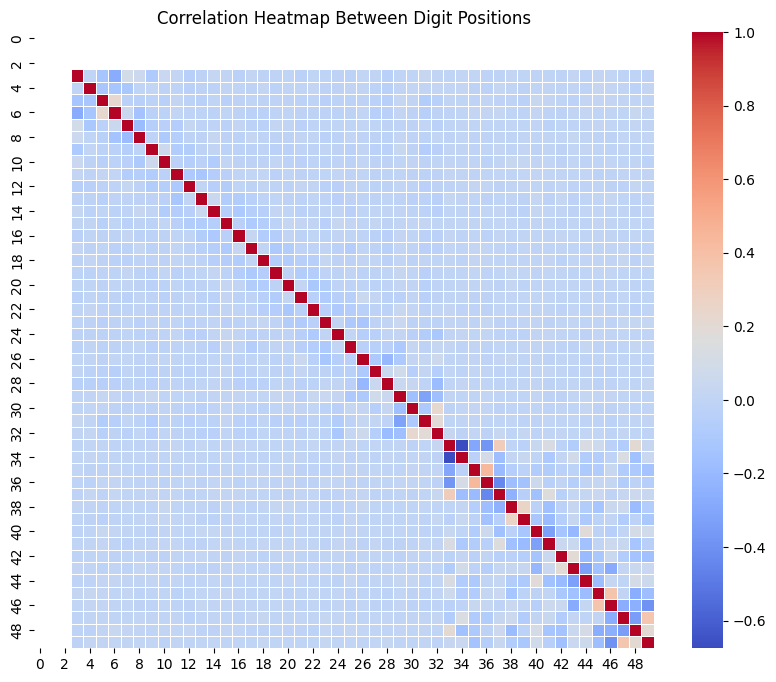

In [7]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Digit Positions')
plt.show()


Almost no correlation in the entries

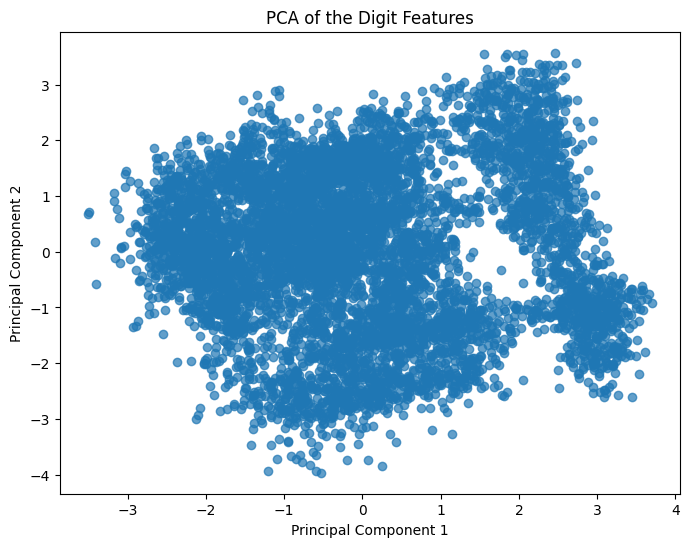

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of the Digit Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [9]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)  # Example threshold
df_reduced = selector.fit_transform(df)


In [10]:
df_reduced.shape

(7080, 47)

In [ ]:
plt.subplots(5, 10, figsize=(20, 10))
for i in range(len(df_reduced)):
    sns.violinplot(df_reduced[i])
    plt.title(f'{i+1}')
    plt.subplot(5, 10, i+1)


ValueError: num must be an integer with 1 <= num <= 50, not 51